In [1]:
import cov_hankel as cov
import numpy as np
import matplotlib.pyplot as plt
import utils as u
import fiducial as fid

Making plot to illustrate how nonlinear scale cuts get more important with upcoming survey for application.

Set-up scenario:

In [3]:
rp0 = 1.5
Pimax=100.
params = {'sigma8':0.83,'b':2.2,'OmB':0.05, 'h':0.68, 'n_s':0.96, 'OmM': 0.3, 'mu_0':0., 'sigma_0': 0.}
rp_bin_edges = np.logspace(np.log10(rp0), np.log10(100.), 15)
rp_bin_c = u.rp_bins_mid(rp_bin_edges)

Get SDSS $\Delta \Sigma$ thory.

In [4]:
Delta_SDSS_lin = fid.Delta_gm(params, rp_bin_edges, 'LOWZ', 'SDSS', 'apps_SDSS', nonlin=False)
Delta_SDSS_nonlin = fid.Delta_gm(params, rp_bin_edges, 'LOWZ', 'SDSS', 'apps_SDSS', nonlin=True)

pyfftlog.py:442: RuntimeWarning: divide by zero encountered in log
  zp = np.log(gamma(xp + y))
pyfftlog.py:443: RuntimeWarning: divide by zero encountered in log
  zm = np.log(gamma(xm + y))
pyfftlog.py:136: RuntimeWarning: divide by zero encountered in log
  zp = np.log(gamma(xp + 1j*y))


Get LSST + DESI $\Delta \Sigma$ theory

In [5]:
Delta_LSST_lin = fid.Delta_gm(params, rp_bin_edges, 'DESI', 'LSST', 'apps_LSST', nonlin=False)
Delta_LSST_nonlin = fid.Delta_gm(params, rp_bin_edges, 'DESI', 'LSST', 'apps_LSST', nonlin=True)

Get covariance matrix for $\Delta \Sigma$ in bins for SDSS and then LSST + DESI

In [6]:
(cov_sdss, a, b) = cov.get_DeltaSigma_covs(params, rp_bin_edges, rp_bin_c, 'LOWZ', 'SDSS', 'apps_SDSS')

j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 29000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 30000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 31000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 32000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 33000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 34000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 35000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 36000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 37000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 38000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 39000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 40000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 41000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 42000
j-nu= 

In [7]:
(cov_LSST, a, b) = cov.get_DeltaSigma_covs(params, rp_bin_edges, rp_bin_c, 'DESI', 'LSST', 'apps_LSST')

j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 29000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 30000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 31000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 32000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 33000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 34000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 35000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 36000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 37000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 38000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 39000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 40000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 41000
j-nu= 2  not enough zeros to cover kmin, increasing by  1000  to 42000
j-nu= 

In [8]:
np.savetxt('./cov_sdss_20bins_max100.txt', cov_sdss)
np.savetxt('./cov_LSST_20bins_max100.txt', cov_LSST)

In [ ]:
#cov_sdss = np.loadtxt('cov_sdss_20bins_max100.txt')
#cov_LSST = np.loadtxt('cov_LSST_20bins_max100.txt')

In [9]:
cut_inds_sdss =  u.linear_scale_cuts(Delta_SDSS_nonlin, Delta_SDSS_lin, cov_sdss, rp_bin_c)
print "sdss done"
cut_inds_lsst =  u.linear_scale_cuts(Delta_LSST_nonlin, Delta_LSST_lin, cov_LSST, rp_bin_c)
print "lsst done"

inv_cov= [[ 7.09594728e+00 -6.78919153e-01 -2.52683249e-01 -1.18615783e-01 -6.92286315e-02 -4.16158647e-02 -2.55961940e-02 -1.26283902e-02 -4.71107210e-03 -1.08187448e-03 -8.48788204e-05  2.42938181e-05 -5.49866514e-05  1.34682198e-04]
 [-6.78919153e-01  1.26968848e+01 -1.41276758e+00 -4.91911381e-01 -2.52117246e-01 -1.45314813e-01 -8.83389608e-02 -4.34571844e-02 -1.61890517e-02 -3.71880196e-03 -2.93145405e-04  8.23987198e-05 -1.84523692e-04  4.52070729e-04]
 [-2.52683249e-01 -1.41276758e+00  2.12185108e+01 -2.83118676e+00 -9.55794091e-01 -4.95312350e-01 -2.93964538e-01 -1.43721468e-01 -5.34337803e-02 -1.22717653e-02 -9.75821334e-04  2.65805961e-04 -5.84049250e-04  1.43098875e-03]
 [-1.18615783e-01 -4.91911381e-01 -2.83118676e+00  3.55894993e+01 -5.76576223e+00 -1.81853577e+00 -1.02139024e+00 -4.92477201e-01 -1.82442164e-01 -4.18587416e-02 -3.37577921e-03  8.70104054e-04 -1.85277331e-03  4.53745078e-03]
 [-6.92286315e-02 -2.52117246e-01 -9.55794091e-01 -5.76576223e+00  6.10216614e+01 -

In [10]:
ind_keep_sdss = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_inds_sdss]
rp_keep_sdss = rp_bin_c[ind_keep_sdss]
Delta_keep_sdss = np.asarray(Delta_SDSS_nonlin)[ind_keep_sdss]

In [11]:
ind_keep_lsst = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_inds_lsst]
rp_keep_lsst = rp_bin_c[ind_keep_lsst]
Delta_keep_lsst = np.asarray(Delta_LSST_nonlin)[ind_keep_lsst]
print zip(rp_keep_lsst, Delta_keep_lsst)

[(25.92648368530804, 0.32979131936708767), (34.996355115805834, 0.260155898047703), (47.239143042202244, 0.1941295598908379), (63.764830022363874, 0.13395063290539352), (86.07170422521298, 0.08439757896978806)]


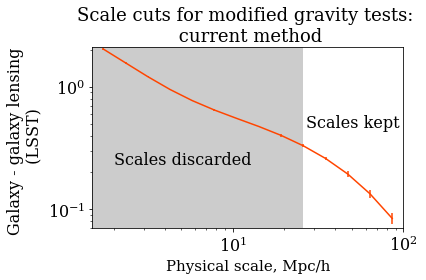

In [75]:
textstr1 = 'Scales discarded'
textstr2 = 'Scales kept'

plt.rcParams["font.family"] = "serif"
plt.figure()
#plt.errorbar(rp_bin_c, Delta_LSST_lin, yerr = np.diag(np.sqrt(cov_LSST)), color='b', label='Linear theory')
plt.errorbar(rp_bin_c, Delta_LSST_nonlin, yerr = np.diag(np.sqrt(cov_LSST)), color='#FF4500', label='With non-linear physics')
plt.fill([1.5,rp_bin_c[ind_keep_lsst[0]],rp_bin_c[ind_keep_lsst[0]],1.5], [0.05,0.05,2.1,2.1], 'k', alpha=0.2)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1.5, 100.)
plt.ylim(0.07, 2.1)
plt.xlabel('Physical scale, Mpc/h', fontsize=15)
plt.ylabel('Galaxy - galaxy lensing \n (LSST)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.text(2, 0.3, textstr1, fontsize=16,
        verticalalignment='top')
plt.text(27, 0.6, textstr2, fontsize=16,
        verticalalignment='top')
#plt.legend(fontsize=14, loc='lower left')
plt.title('Scale cuts for modified gravity tests: \n current method', fontsize=18)
plt.tight_layout()
plt.savefig('./scalecuts.pdf')

In [ ]:
plt.rcParams["font.family"] = "serif"
plt.figure()
plt.errorbar(rp_bin_c, Delta_SDSS_lin, yerr = np.diag(np.sqrt(cov_sdss)), color='b')
plt.errorbar(rp_bin_c, Delta_SDSS_nonlin, yerr = np.diag(np.sqrt(cov_sdss)), color='#FF4500')
plt.fill([1.5,rp_bin_c[ind_keep_sdss[0]],rp_bin_c[ind_keep_sdss[0]],1.5], [0.2,0.2,5.,5.], 'k', alpha=0.2)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1.5, 60.)
plt.ylim(0.2, 5.)
plt.xlabel('$r_p$, Mpc/h', fontsize=15)
plt.ylabel('Galaxy - galaxy lensing', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Existing data: SDSS', fontsize=20)
plt.show()

In [ ]:
import postprocess as p

In [ ]:
plt.figure(figsize=(5, 5))
plt.rcParams["font.family"] = "serif"
plt.imshow(cov_sdss, aspect=1, interpolation='None')
plt.colorbar()
plt.subplots_adjust(top=0.88)
#plt.suptitle("$\Upsilon_{gm}$, $\Upsilon_{gg}$, $\\beta$ covariance", fontsize='35')
plt.tight_layout()
#plt.savefig('../plots/corr_jp_'+lens+'_'+src+'_'+endfilename+'.png')
plt.show()

plt.figure(figsize=(5, 5))
plt.rcParams["font.family"] = "serif"
plt.imshow(cov_LSST, aspect=1, interpolation='None')
plt.colorbar()
plt.subplots_adjust(top=0.88)
#plt.suptitle("$\Upsilon_{gm}$, $\Upsilon_{gg}$, $\\beta$ covariance", fontsize='35')
plt.tight_layout()
#plt.savefig('../plots/corr_jp_'+lens+'_'+src+'_'+endfilename+'.png')
plt.show()

In [ ]:
np.sqrt(0.0005) 


In [ ]:
np.sqrt(0.1)